## Goals
### Primary Goal: Identify whether there is a bottle
### Stretched Goal: Identify what type of bottle it is
### Dataset used:
#### https://www.kaggle.com/datasets/moezabid/bottles-and-cans/code?resource=download
#### https://www.kaggle.com/datasets/arkadiyhacks/drinking-waste-classification/code
#### https://www.kaggle.com/datasets/shamsaddin97/image-captioning-dataset-random-images

In [1]:
from utils import *
from random import randint
import torch
import torch.nn as nn
import numpy as np
from torchvision import transforms
import time
import cv2
import matplotlib.pyplot as plt
import torchvision.models as models
import tensorflow as tf
import os
import pandas as pd
from fastai.vision import *
from pathlib import Path
from PIL import Image

In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# device = torch.device("cpu") 
default_epoch = 15

In [3]:
def pil_loader(path):
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')
    
def show(X):
    plt.imshow(np.transpose(X.numpy(), (1,2,0)))
    plt.show()

In [97]:
# Normalize and resize the images
transform = torch.nn.Sequential(
    transforms.Resize((128,64)),
    transforms.Normalize((0.5665, 0.5473, 0.4851), (0.2286, 0.2158, 0.2415))    
)  # Normalised values obtained from training dataset.

In [80]:
onlyfiles_bottle = [f for f in os.listdir('data/Bottle2')]
print(type(onlyfiles_bottle))
print(len(onlyfiles_bottle))

onlyfiles_nobottle = [f for f in os.listdir('data/NoBottle2')]
print(len(onlyfiles_nobottle))

<class 'list'>
4753
2097


In [98]:
# Bottle
onlyfiles_bottle = [f for f in os.listdir('data/Bottle2')]
print(type(onlyfiles_bottle))
print(len(onlyfiles_bottle))

samples_bottle = []
for i, filenames in enumerate(onlyfiles_bottle):
    samples_bottle.append([filenames, 1])             # Assign label of 1 when there is bottle

np.random.seed(3)
p = np.random.permutation(len(samples_bottle))
samples_bottle = np.array(samples_bottle)

print(type(samples_bottle))
print(len(samples_bottle))

test_data_bottle = samples_bottle[p[:1500]][:,0]
test_labels_bottle = samples_bottle[p[:1500]][:,1]
train_data_bottle = samples_bottle[p[1500:]][:,0]
train_labels_bottle = samples_bottle[p[1500:]][:,1]

print(len(test_data_bottle))
print(len(train_data_bottle))

def getBottle(train, index):
    if train:
        img_path, label = train_data_bottle[index], train_labels_bottle[index]
    else:
        img_path, label = test_data_bottle[index], test_labels_bottle[index]

    img = pil_loader('data/Bottle2/' + img_path)
    
    img = transforms.Resize((128,64))(img)
    img = transforms.ToTensor()(img)
    img = transform(img)

    return img, label

<class 'list'>
4752
<class 'numpy.ndarray'>
4752
1500
3252


In [99]:
# No bottle
onlyfiles_nobottle = [f for f in os.listdir('data/NoBottle2')]
print(len(onlyfiles_nobottle))

samples_nobottle = []
for i, filenames in enumerate(onlyfiles_nobottle):
    samples_nobottle.append([filenames, 0])             # Assign label of 0 when there is no bottle

np.random.seed(3)
p = np.random.permutation(len(samples_nobottle))
samples_nobottle = np.array(samples_nobottle)

print(type(samples_nobottle))
print(len(samples_nobottle))

test_data_nobottle = samples_nobottle[p[:600]][:,0]
test_labels_nobottle = samples_nobottle[p[:600]][:,1]
train_data_nobottle = samples_nobottle[p[600:]][:,0]
train_labels_nobottle = samples_nobottle[p[600:]][:,1]

print(len(test_data_nobottle))
print(len(train_data_nobottle))

def getNoBottle(train, index):
    if train:
        img_path, label = train_data_nobottle[index], train_labels_nobottle[index]
    else:
        img_path, label = test_data_nobottle[index], test_labels_nobottle[index]

    img = pil_loader('data/NoBottle2/' + img_path)
    #img = transforms.Resize(32)(img)
    img = transforms.Resize((128,64))(img)
    #img = transforms.Resize(64)(img)
    img = transforms.ToTensor()(img)
    img = transform(img)

    return img, label

2097
<class 'numpy.ndarray'>
2097
600
1497


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bottle Train Image


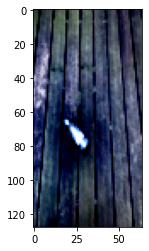

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(tensor([[[ 0.1637,  0.1637,  0.1465,  ...,  0.1465,  0.0951, -0.3338],
         [ 0.1465,  0.1809,  0.1637,  ...,  0.0951,  0.1465, -0.3853],
         [ 0.1980,  0.1980,  0.1637,  ...,  0.1122,  0.1637, -0.3853],
         ...,
         [ 0.2323,  0.0951, -0.7112,  ...,  0.1637,  0.2838,  0.5926],
         [ 0.2152,  0.0608, -0.6254,  ...,  0.1465,  0.1980,  0.4039],
         [ 0.1294, -0.0250, -0.5568,  ...,  0.1637,  0.2152,  0.3009]],

        [[ 0.2260,  0.2260,  0.2079,  ...,  0.1715,  0.0988, -0.3373],
         [ 0.2079,  0.2442,  0.2260,  ...,  0.0988,  0.1533, -0.3918],
         [ 0.2624,  0.2806,  0.2442,  ...,  0.1170,  0.1715, -0.3918],
         ...,
         [ 0.2806,  0.1533, -0.7007,  ...,  0.1897,  0.2987,  0.5895],
         [ 0.2624,  0.0988, -0.6099,  ...,  0.1715,  0.2260,  0.4078],
         [ 0.1715,  0.0080, -0.5372,  ...,  0.1897,  0.2442,  0.3169]],

        [[ 0.2160,  0.2322,  0.1997,  ...,  0.2484,  0.1997, -0.1575],
         [ 0.1997,  0.2322,  0.1997,  ...,  

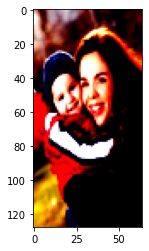

In [100]:
print("Bottle Train Image")
bottle_train_img = getBottle(train=True, index=0)
show(bottle_train_img[0])
print(bottle_train_img)
print(type(bottle_train_img))

print("No Bottle Train Image")
nobottle_train_img = getNoBottle(train=True, index=0)
show(nobottle_train_img[0])

In [101]:
#bottle_train_data = getNoBottle(train=True, index=i)
train_data = []
for i in range(3252):
    train_data.append(getBottle(train=True, index=i))
for i in range(1497):
    train_data.append(getNoBottle(train=True, index=i))
print(len(train_data))  

test_data = []
for i in range(1500):
    test_data.append(getBottle(train=False, index=i))
for i in range(600):
    test_data.append(getNoBottle(train=False, index=i))
print(len(test_data))

print(type(getBottle(train=True, index=0)))
print(type(train_data))

4749
2100
<class 'tuple'>
<class 'list'>


In [102]:
print(train_data[0][0].size())
print(train_data[1][0].size())

torch.Size([3, 128, 64])
torch.Size([3, 128, 64])


In [103]:
# Load into dataloader for easier batching
bs = 64
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=bs, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=bs)

In [96]:
# Getting the mean and std across all three channels for normalisation. Run only once.
means = []
stds = []
for i in train_data:
    means.append((i[0]))
    stds.append(i[0])
test =  torch.cat(means)
test = test.view(-1,3,128,64)
print(test.mean(axis=(0,2,3)))
print(test.std(axis=(0,2,3)))

tensor([0.5665, 0.5473, 0.4851])
tensor([0.2286, 0.2158, 0.2415])


In [104]:
# MLP
class BaseMLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(BaseMLP, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.layer3 = nn.Linear(hidden_size2, hidden_size3)
        self.layer4 = nn.Linear(hidden_size3, output_size)
        
    def forward(self, x):
        x = x.view(-1,24576)
        x = self.layer1(x)
        x = torch.relu(x)
        x = self.layer2(x)
        x = torch.relu(x)
        x = self.layer3(x)
        x = torch.relu(x)
        x = self.layer4(x)
        return x
    
# CNN
class BaseCNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BaseCNN, self).__init__()
        self.output_size = output_size
        self.conv1 = nn.Conv2d(input_size, hidden_size, kernel_size = 3, stride = 2, padding = 1) #3*128*64 -> 8*64*32
        self.conv2 = nn.Conv2d(hidden_size, output_size, kernel_size = 3,stride =2, padding = 1) #8*64*32 -> 16*32*16
        self.linearlayer1 = nn.Linear(output_size*32*16, 2)                                     #16*32*16 -> 1*8192
        
    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = x.view(-1, self.output_size*32*16)
        x = self.linearlayer1(x)
        return x
        
#basemlp = BaseMLP(3*128*64, 128, 64, 32, 2)
#basecnn = BaseCNN(3, 8, 16)

In [105]:
def init_list():
    """
    init an empty list of list for data storage"""
    lst = [] 
    for i in range(8):
        lst.append([]) 
    return lst

In [106]:
# Training function
def train(epochs, dataloader, testdataloader, model, lr, loss_class, opt, out_result = init_list()):
    start = time.time()
    for i in range(epochs):
        validation_loss = 0.0
        running_loss = 0.0
        num_batches = 0
        for batch_idx, [data, label] in enumerate(dataloader):
            opt.zero_grad()
            label = [int(x) for x in label]
            label = torch.LongTensor(label)
            if str(device.type) == "cuda" :
                data, label = data.cuda(), label.cuda()
            else :
                data, label = data.cpu(), label.cpu()     
                
            scores = model(data)
            loss = loss_class(scores, label)
            loss.backward()
            opt.step()
            

            running_loss += loss.detach().item()
            num_batches += 1
            
        total_loss = running_loss/num_batches
        print(f'epoch={i + 1},\t lr={lr},\t loss={total_loss}')
        
        eval(model, testdataloader, out_result)
    print(f'Time elapsed:{time.time()-start}')
    out_result.append(time.time()-start)

In [107]:
# Testing code
def eval(model, setloader, out_result = init_list()):
    correct_count = 0
    total_count = 0
    
    prediction = torch.zeros(0).cpu()
    truth = torch.zeros(0).cpu()
    
#    if is_on_cuda :
#        prediction = torch.zeros(0).cuda()
#        truth = torch.zeros(0).cuda()
    
    for batch_idx, [data, label] in enumerate(setloader):
        label = torch.LongTensor([int(x) for x in label])
        if str(device.type) == "cuda" :
            data, label = data.cuda(), label.cuda()
            print("cuda is on")
        else :
            data, label = data.cpu(), label.cpu()
        
        probs = model(data)
        probs = nn.Softmax(dim=1)(probs)
        pred = torch.argmax(probs, dim=1)
        
        # Result collection
#         correct_count += torch.sum(label==pred).detach().item()
#         total_count += len(data)
        prediction = torch.cat((prediction, pred),dim=0)
        truth = torch.cat((truth, label),dim=0)
        #print(torch.sum(label==pred).detach().item())
        
    # Results calculation here
    prediction, truth = prediction.detach(), truth.detach()
    #display.metrics(prediction, truth)
    calculate(prediction, truth, out_result)

In [108]:
def calculate(prediction, truth, out):
    """
    Takes in a tensor of predictions and a tensor of labels.
    Store tp, fp, tn, fn, acc, precision, recall ,f1 in this order."""
    acc = torch.sum(prediction==truth).item() / len(prediction)
    confusion_vector = prediction/truth
    tp = torch.sum(confusion_vector == 1).item()
    fp = torch.sum(confusion_vector == float('inf')).item()
    tn = torch.sum(torch.isnan(confusion_vector)).item()
    fn = torch.sum(confusion_vector == 0).item()
    precision = 0 if (tp+fp) == 0 else tp/(tp+fp)
    recall = 0 if (tp+fn) == 0 else tp/(tp+fn)
    f1 = 0 if (precision+recall) == 0 else 2*precision*recall/(precision+recall)
    out[0].append(float(tp))
    out[1].append(float(fp))
    out[2].append(float(tn))
    out[3].append(float(fn))
    out[4].append(acc)
    out[5].append(precision)
    out[6].append(recall)
    out[7].append(f1)

In [109]:
baseCNN = BaseCNN(3, 8, 16).to(device)    
# bs=32  @ adjust batchsize in dataloader 
lr = 0.001
opt = torch.optim.Adam(baseCNN.parameters(), lr=lr)
epoch = default_epoch
loss_class = nn.CrossEntropyLoss()

result_base_cnn = init_list()
train(epoch, train_dataloader, test_dataloader, baseCNN, lr, loss_class, opt, result_base_cnn)

epoch=1,	 lr=0.001,	 loss=0.26526140729586284
epoch=2,	 lr=0.001,	 loss=0.13394323915243148
epoch=3,	 lr=0.001,	 loss=0.110777526323994
epoch=4,	 lr=0.001,	 loss=0.11947653189301491
epoch=5,	 lr=0.001,	 loss=0.09929450139403344
epoch=6,	 lr=0.001,	 loss=0.0884496375421683
epoch=7,	 lr=0.001,	 loss=0.08915089882910252
epoch=8,	 lr=0.001,	 loss=0.07256997007876635
epoch=9,	 lr=0.001,	 loss=0.0635586151232322
epoch=10,	 lr=0.001,	 loss=0.0624653497710824
epoch=11,	 lr=0.001,	 loss=0.05763822846114636
epoch=12,	 lr=0.001,	 loss=0.05196268090357383
epoch=13,	 lr=0.001,	 loss=0.047273121364414694
epoch=14,	 lr=0.001,	 loss=0.04508026323591669
epoch=15,	 lr=0.001,	 loss=0.04144963889072339
Time elapsed:51.2550790309906


In [110]:
eval(baseCNN, test_dataloader)

In [111]:
baseMLP = BaseMLP(3*128*64, 128, 64, 32, 2).to(device)
# bs=32  @ adjust batchsize in dataloader 
lr = 0.001
opt = torch.optim.Adam(baseMLP.parameters(), lr=lr)
epoch = default_epoch
loss_class = nn.CrossEntropyLoss()

result_base_mlp = init_list()
train(epoch, train_dataloader, test_dataloader, baseMLP, lr, loss_class, opt, result_base_mlp)

epoch=1,	 lr=0.001,	 loss=0.48242110272248584
epoch=2,	 lr=0.001,	 loss=0.3613207299510638
epoch=3,	 lr=0.001,	 loss=0.2594707800944646
epoch=4,	 lr=0.001,	 loss=0.22542818893988928
epoch=5,	 lr=0.001,	 loss=0.17622049550215405
epoch=6,	 lr=0.001,	 loss=0.20286522467931112
epoch=7,	 lr=0.001,	 loss=0.1337034366528193
epoch=8,	 lr=0.001,	 loss=0.11035180998345216
epoch=9,	 lr=0.001,	 loss=0.13766451256970563
epoch=10,	 lr=0.001,	 loss=0.07918485812842846
epoch=11,	 lr=0.001,	 loss=0.0807535641392072
epoch=12,	 lr=0.001,	 loss=0.05870193767050902
epoch=13,	 lr=0.001,	 loss=0.03204537451344853
epoch=14,	 lr=0.001,	 loss=0.03367347776889801
epoch=15,	 lr=0.001,	 loss=0.02781908326006184
Time elapsed:13.092978715896606


In [112]:
eval(baseMLP, test_dataloader)

In [113]:
# Alexnet
import gc
gc.collect()
alexnet = models.alexnet().to(device)  #lowest val loss 0.55
lr = 0.0001 
opt = torch.optim.Adam(alexnet.parameters(), lr=lr)
epoch = 15
loss_class = nn.CrossEntropyLoss()

result_alexnet = init_list()
train(epoch, train_dataloader,test_dataloader, alexnet, lr, loss_class, opt, result_alexnet)

epoch=1,	 lr=0.0001,	 loss=1.102383220990499
epoch=2,	 lr=0.0001,	 loss=0.271243511736393
epoch=3,	 lr=0.0001,	 loss=0.16166376012067
epoch=4,	 lr=0.0001,	 loss=0.13777202110737563
epoch=5,	 lr=0.0001,	 loss=0.10748091346273819
epoch=6,	 lr=0.0001,	 loss=0.08341243860622247
epoch=7,	 lr=0.0001,	 loss=0.05898814184280733
epoch=8,	 lr=0.0001,	 loss=0.05610526284823815
epoch=9,	 lr=0.0001,	 loss=0.06068852037191391
epoch=10,	 lr=0.0001,	 loss=0.040061037813623745
epoch=11,	 lr=0.0001,	 loss=0.03855132391676307
epoch=12,	 lr=0.0001,	 loss=0.023614578703030322
epoch=13,	 lr=0.0001,	 loss=0.05452035494148731
epoch=14,	 lr=0.0001,	 loss=0.03312506334856152
epoch=15,	 lr=0.0001,	 loss=0.041886890263607104
Time elapsed:597.0662157535553


In [114]:
eval(alexnet, test_dataloader)

In [40]:
# vgg16
vgg16 = models.vgg16().to(device)
lr = 0.0001
opt = torch.optim.Adam(vgg16.parameters(), lr=lr)
epoch = default_epoch
loss_class = nn.CrossEntropyLoss()


result_vgg16 = init_list()
train(epoch, train_dataloader, test_dataloader, vgg16, lr, loss_class, opt, result_vgg16)

epoch=1,	 lr=0.0001,	 loss=2.1551543983320394
epoch=2,	 lr=0.0001,	 loss=0.4983517520983393
epoch=3,	 lr=0.0001,	 loss=0.2743975181753437
epoch=4,	 lr=0.0001,	 loss=0.16281664185225964
epoch=5,	 lr=0.0001,	 loss=0.1028518642609318
epoch=6,	 lr=0.0001,	 loss=0.05083359614945948
epoch=7,	 lr=0.0001,	 loss=0.034514115434528016
epoch=8,	 lr=0.0001,	 loss=0.03158018991234712
epoch=9,	 lr=0.0001,	 loss=0.017395722403307445
epoch=10,	 lr=0.0001,	 loss=0.001649585068662418
epoch=11,	 lr=0.0001,	 loss=0.0021770030030457597
epoch=12,	 lr=0.0001,	 loss=0.0051193896822117795
epoch=13,	 lr=0.0001,	 loss=0.0010932298549377606
epoch=14,	 lr=0.0001,	 loss=0.012523642871930937
epoch=15,	 lr=0.0001,	 loss=0.0026356328177522905
Time elapsed:1019.6848719120026


In [41]:
eval(vgg16, test_dataloader)

In [115]:
# Squeezenet1_1
import gc
gc.collect()

squeezenet1_1 = models.squeezenet1_1().to(device)
lr = 0.0003
opt = torch.optim.Adam(squeezenet1_1.parameters(), lr=lr)
epoch = default_epoch
loss_class = nn.CrossEntropyLoss()

result_squeezenet1_1 = init_list()
train(epoch, train_dataloader,test_dataloader, squeezenet1_1, lr, loss_class, opt, result_squeezenet1_1)

epoch=1,	 lr=0.0003,	 loss=1.08829936226209
epoch=2,	 lr=0.0003,	 loss=0.2743015972773234
epoch=3,	 lr=0.0003,	 loss=0.2148208619157473
epoch=4,	 lr=0.0003,	 loss=0.15288003926475843
epoch=5,	 lr=0.0003,	 loss=0.11274923021594684
epoch=6,	 lr=0.0003,	 loss=0.10365582664807638
epoch=7,	 lr=0.0003,	 loss=0.08951688130696614
epoch=8,	 lr=0.0003,	 loss=0.08502270313600699
epoch=9,	 lr=0.0003,	 loss=0.07509202441821496
epoch=10,	 lr=0.0003,	 loss=0.06872972898495694
epoch=11,	 lr=0.0003,	 loss=0.05578491125876705
epoch=12,	 lr=0.0003,	 loss=0.05997737518666933
epoch=13,	 lr=0.0003,	 loss=0.07647052642889321
epoch=14,	 lr=0.0003,	 loss=0.07073996847883487
epoch=15,	 lr=0.0003,	 loss=0.055781793420513474
Time elapsed:467.0987548828125


In [116]:
eval(squeezenet1_1, test_dataloader)

In [44]:
def comparison_graph(title, y_label, x_label, results, result_index, labels, markers): 
	# plot
	fig, ax = plt.subplots()
	fig.set_size_inches(10, 5)
	max_x = 0
	for i in range(len(labels)): 
		# make epoc list
		x = array = np.arange(1, len(results[i][result_index])+1)
		max_x = max(max_x, len(results[i][result_index]))
		ax.plot(x, results[i][result_index], linewidth=1.0, label=labels[i], marker = markers[i])
	ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
	ax.set(xlabel= x_label, ylabel= y_label, title=title, xlim=(0, max_x + 0.5), xticks=np.arange(1, max_x + 1))
	plt.show()

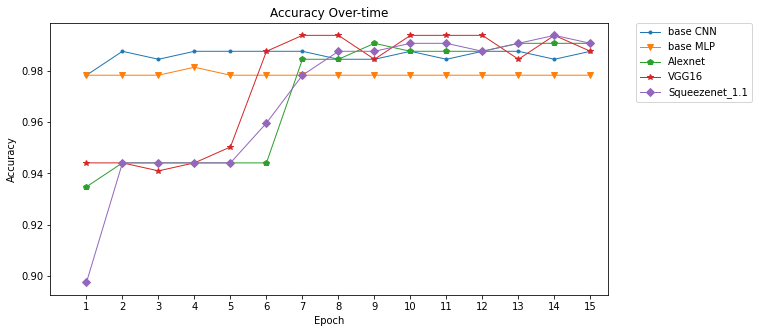

In [45]:
results = [result_base_cnn, result_base_mlp, result_alexnet, result_vgg16, result_squeezenet1_1]
labels = ["base CNN", "base MLP", "Alexnet", "VGG16", "Squeezenet_1.1"]
markers = [".","v","p","*","D"] 

comparison_graph("Accuracy Over-time", "Accuracy", "Epoch", results, 4, labels, markers)

In [46]:
final_result_baseCNN = init_list();
final_result_baseMLP = init_list();
final_result_alexnet = init_list();
final_result_vgg16 = init_list();
final_result_squeezenet1_1 = init_list();

print('baseCNN')
start = time.time()
eval(baseCNN, test_dataloader, final_result_baseCNN)
final_result_baseCNN.append((time.time()-start)/ len(test_data))

start = time.time()
print('baseMLP')
eval(baseMLP, test_dataloader, final_result_baseMLP)
final_result_baseMLP.append((time.time()-start)/ len(test_data))

start = time.time()
print('AlexNet')
eval(alexnet, test_dataloader, final_result_alexnet)
final_result_alexnet.append((time.time()-start)/ len(test_data))

start = time.time()
print('VGG16')
eval(vgg16, test_dataloader, final_result_vgg16)
final_result_vgg16.append((time.time()-start)/ len(test_data))

start = time.time()
print('Squeezenetv1.1')
eval(squeezenet1_1, test_dataloader, final_result_squeezenet1_1)
final_result_squeezenet1_1.append((time.time()-start)/ len(test_data))

baseCNN
baseMLP
AlexNet
VGG16
Squeezenetv1.1


In [47]:
def bar_graph(title, x_label, y_label, results, result_index, labels): 
    # plot
    fig, ax = plt.subplots()
    fig.set_size_inches(9, 4)
    max_x = 0
    values = []
    for i in range(len(labels)): 
        values.append(results[i][result_index])

    ax.barh(labels, values)
    ax.set(xlabel= x_label, ylabel= y_label, title=title)
    plt.show()

In [48]:
final_results = [final_result_baseCNN, final_result_baseMLP, final_result_alexnet,
           final_result_vgg16, final_result_squeezenet1_1]

final_labels = ["base CNN", "base MLP", "Alexnet", "VGG16", "Squeezenet_1.1"]

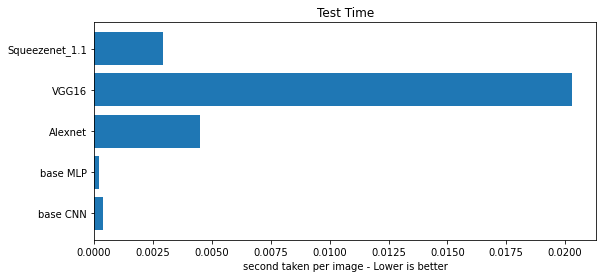

In [49]:
bar_graph("Test Time", "second taken per image - Lower is better", "", final_results, 8, final_labels)

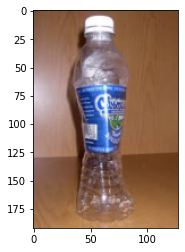

tensor([1.])


In [121]:
test_img_path = 'bottle2.jpeg'
test_img = pil_loader('data/Actual/' + test_img_path)
test_img = transforms.Resize(128)(test_img)
test_img = transforms.ToTensor()(test_img)
show(test_img)

#After normalization

test_img = transform(test_img)

prediction = torch.zeros(0).cpu()

data = test_img
probs = baseMLP(data)
probs = nn.Softmax(dim=1)(probs)
pred = torch.argmax(probs, dim=1)

prediction = torch.cat((prediction, pred),dim=0)
        
prediction= prediction.detach()

print(prediction)

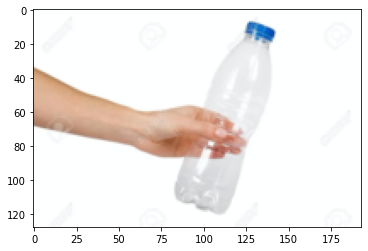

tensor([0.])


In [122]:
test_img_path = 'bottle.jpeg'
test_img = pil_loader('data/Actual/' + test_img_path)
test_img = transforms.Resize(128)(test_img)
test_img = transforms.ToTensor()(test_img)
show(test_img)

#After normalization

test_img = transform(test_img)

prediction = torch.zeros(0).cpu()

data = test_img
probs = baseMLP(data)
probs = nn.Softmax(dim=1)(probs)
pred = torch.argmax(probs, dim=1)

prediction = torch.cat((prediction, pred),dim=0)
        
prediction= prediction.detach()

print(prediction)

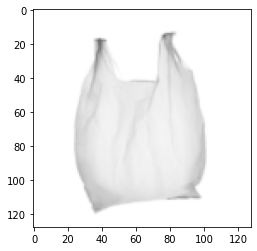

tensor([0.])


In [123]:
test_img_path = 'plasticbag.jpg'
test_img = pil_loader('data/Actual/' + test_img_path)
test_img = transforms.Resize(128)(test_img)
test_img = transforms.ToTensor()(test_img)
show(test_img)

#After normalization

test_img = transform(test_img)

prediction = torch.zeros(0).cpu()

data = test_img
probs = baseMLP(data)
probs = nn.Softmax(dim=1)(probs)
pred = torch.argmax(probs, dim=1)

prediction = torch.cat((prediction, pred),dim=0)
        
prediction= prediction.detach()

print(prediction)

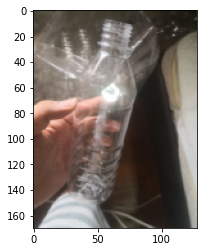

tensor([0.])


In [124]:
test_img_path = 'bottlehand.jpg'
test_img = pil_loader('data/Actual/' + test_img_path)
test_img = transforms.Resize(128)(test_img)
test_img = transforms.ToTensor()(test_img)
show(test_img)

#After normalization

test_img = transform(test_img)

prediction = torch.zeros(0).cpu()

data = test_img
probs = baseMLP(data)
probs = nn.Softmax(dim=1)(probs)
pred = torch.argmax(probs, dim=1)

prediction = torch.cat((prediction, pred),dim=0)
        
prediction= prediction.detach()

print(prediction)

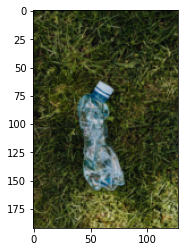

tensor([1.])


In [125]:
test_img_path = 'bottle3.jpg'
test_img = pil_loader('data/Actual/' + test_img_path)
test_img = transforms.Resize(128)(test_img)
test_img = transforms.ToTensor()(test_img)
show(test_img)

#After normalization

test_img = transform(test_img)

prediction = torch.zeros(0).cpu()

data = test_img
probs = baseMLP(data)
probs = nn.Softmax(dim=1)(probs)
pred = torch.argmax(probs, dim=1)

prediction = torch.cat((prediction, pred),dim=0)
        
prediction= prediction.detach()

print(prediction)